In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def cropped_cdf(t, tau, time_window):
    cdf = (np.exp(-time_window[0]/tau)-np.exp(-t/tau))/(np.exp(-time_window[0]/tau) - np.exp(-time_window[1]/tau))
    return cdf

def cropped_pdf(t, tau, time_window):
    pdf = 1/tau * 1/((np.exp(-time_window[0]/tau) - np.exp(-time_window[1]/tau))) * np.exp(-t/tau)
    return pdf

def decay_time(u, tau, time_window):
    t = -tau * np.log(np.exp(-time_window[0]/tau) - u * (np.exp(-time_window[0]/tau - np.exp(-time_window[1]/tau))))
    return t

In [2]:
# code sample to randomly sample decay times from a distribution

tau_Po218 = 3.097 * 60 / np.log(2)
tau_Pb214 = 27.06 * 60 / np.log(2)
tau_At218 = 1.27 / np.log(2)
tau_Bi214 = 19.71 * 60 / np.log(2)
tau_Po214 = 163.6E-6 / np.log(2)
tau_Tl210 = 1.3 * 60 / np.log(2)
tau_Pb210 = 22.2 * (60 * 60 * 24 * 365) / np.log(2)

tau = tau_At218 # 100 * s mean half life
tau_prior = tau_Po218
time_window = [0, 1] # in s
samples = int(1E6)

u = np.random.uniform(0,1,samples)

time_ini = np.random.uniform(time_window[0],time_window[1],samples) # initial time
time_decay = - np.log(1-u) * tau # decay time
time_tot = time_ini + time_decay

inside = (time_tot<= time_window[1]).sum()/samples
legacy = tau/tau_prior * (np.exp(-time_window[0]/tau)-np.exp(-time_window[1]/tau))
print("{:.3f} % of coincident decays are within [{}, {}] s window.".format(inside * 100, time_window[0], time_window[1]))
print("{:.3f} % of legacy events are within [{}, {}] s window.".format(legacy * 100, time_window[0], time_window[1]))

22.968 % of coincident decays are within [0, 1] s window.
0.287 % of legacy events are within [0, 1] s window.


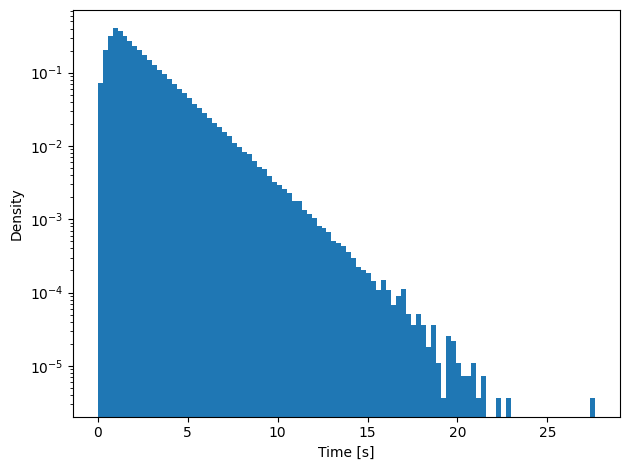

In [3]:
fig, ax = plt.subplots(1,1)

ax.hist(time_tot, bins = 100, density=True)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Density")

plt.tight_layout()

100.000 % of decays are within [-99, 1] s window.


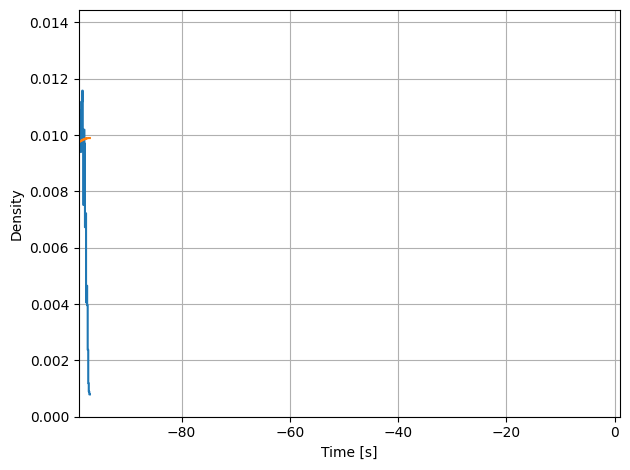

In [14]:
# code to randomly sample decay times from a distribution

tau = 1 # 100 * s mean half life
time_window = [-99, 1] # in s
samples = int(1E5)

u = np.random.uniform(0,1,samples)

time_ini = np.random.uniform(time_window[0],time_window[1],samples) # initial time
#time_decay = -tau * np.log(np.exp(-time_window[0]/tau) - u * (np.exp(-time_window[0]/tau) - np.exp(-time_window[1]/tau))) # decay time
time_decay = decay_time(u, tau, time_window)
time_tot = time_decay + time_ini

inside = (time_tot<= time_window[1]).sum()/samples
print("{:.3f} % of decays are within [{}, {}] s window.".format(inside * 100, time_window[0], time_window[1]))


bins = 1000
y, bin_edges = np.histogram(time_tot, density=True, bins = bins)
x = (bin_edges[1:]+bin_edges[:-1])/2


tt = np.linspace(time_window[0], time_window[1], num=bins)

fig, ax = plt.subplots(1,1)

ax.step(x, y, label = "pdf")
ax.step(x, np.cumsum(y)/bins)

#ax.plot(tt, cropped_pdf(tt, tau, time_window), color = "k", ls = "--")
#ax.plot(tt, cropped_cdf(tt, tau, time_window), color = "k", ls = "--")

ax.set_xlabel("Time [s]")
ax.set_ylabel("Density")

ax.set_xlim(time_window[0], time_window[1])
ax.set_ylim(0,)
plt.grid(True)
#plt.yscale("log")
plt.tight_layout()


Text(0, 0.5, 'Normalized PDF')

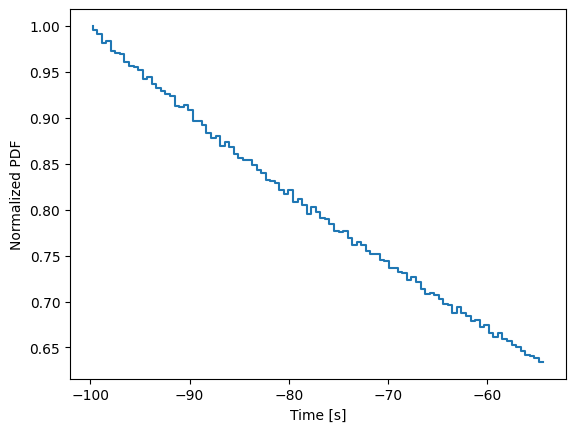

In [60]:
samples = int(1E7)
time_window = [-100,0]
tau = 100

u = np.random.uniform(0,1,samples)

#ti = np.random.uniform(time_window[0],time_window[1],samples) # initial time
td = decay_time(u, tau, [time_window[0],time_window[1]])

#plt.hist(ti, histtype="step", bins = 100)
y, edge = np.histogram(td, bins = 100)
y = y/(samples*(edge[1]-edge[0]))
x = (edge[1:]+edge[:-1])/2

plt.step(x, y/y[0])
plt.xlabel("Time [s]")
plt.ylabel("Normalized PDF")
#plt.hist(ti+td, histtype="step", bins = 100)

(array([[1257., 1234., 1265., ...,  746.,  825.,  740.],
        [1224., 1167., 1280., ...,  778.,  797.,  807.],
        [1282., 1268., 1262., ...,  794.,  779.,  771.],
        ...,
        [1245., 1266., 1241., ...,  749.,  773.,  774.],
        [1206., 1312., 1251., ...,  811.,  762.,  814.],
        [1274., 1248., 1221., ...,  787.,  786.,  754.]]),
 array([-458.20997465, -453.61787501, -449.02577537, -444.43367573,
        -439.84157609, -435.24947644, -430.6573768 , -426.06527716,
        -421.47317752, -416.88107787, -412.28897823, -407.69687859,
        -403.10477895, -398.5126793 , -393.92057966, -389.32848002,
        -384.73638038, -380.14428074, -375.55218109, -370.96008145,
        -366.36798181, -361.77588217, -357.18378252, -352.59168288,
        -347.99958324, -343.4074836 , -338.81538395, -334.22328431,
        -329.63118467, -325.03908503, -320.44698539, -315.85488574,
        -311.2627861 , -306.67068646, -302.07858682, -297.48648717,
        -292.89438753, -288.302

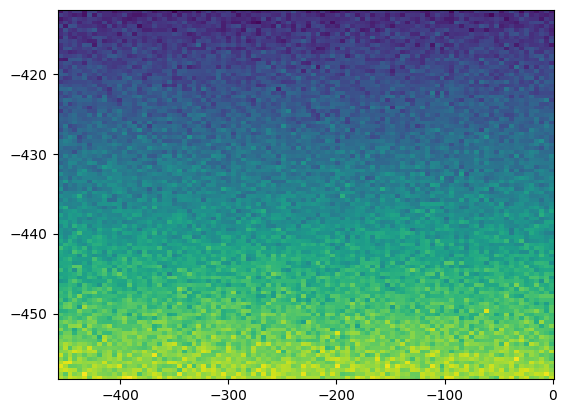

In [ ]:
#H, x_edges, y_edges = np.histogram2d(ti,td, bins = 100)

plt.hist2d(ti,td,bins =100)

In [55]:
ti[:10],td[:10]

(array([-107.39127512, -208.16444662, -348.05306353, -273.45379391,
         -78.83862195, -226.28291821,  -80.27052733, -115.24773833,
        -153.35692911, -336.56712523]),
 array([-456.39887273, -418.78873774, -443.83751288, -433.7351938 ,
        -430.9191628 , -425.64248908, -427.51720502, -443.59239302,
        -446.86862455, -447.44493982]))

In [ ]:
def signsum(a,b):
    